In [10]:
import os

import numpy as np
import pandas as pd
import statsmodels as sm
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv(os.path.join('datasets', 'abalone.csv'))

In [7]:
print "The columns: ", [c for c in df.columns]

The columns:  ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']


In [13]:
X = df.drop('Sex', axis=1, inplace=False)
y = df.Sex

In [20]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
print type(X_train)
print type(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [25]:
X_train.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
3141,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
3521,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
883,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3627,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
2106,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [27]:
X_train.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


In [28]:
X_train.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986626,0.809545,0.925283,0.898074,0.901923,0.896668,0.551926
Diameter,0.986626,1.000000,0.815144,0.924761,0.892732,0.898102,0.903953,0.569614
Height,0.809545,0.815144,1.000000,0.802585,0.761996,0.780910,0.799362,0.533590
WholeWeight,0.925283,0.924761,0.802585,1.000000,0.969501,0.965920,0.953238,0.535350
ShuckedWeight,0.898074,0.892732,0.761996,0.969501,1.000000,0.932480,0.879739,0.414353
VisceraWeight,0.901923,0.898102,0.780910,0.965920,0.932480,1.000000,0.904726,0.496502
ShellWeight,0.896668,0.903953,0.799362,0.953238,0.879739,0.904726,1.000000,0.625154
Rings,0.551926,0.569614,0.533590,0.535350,0.414353,0.496502,0.625154,1.000000


**Length** and **Diameter** are highly correlated (0.986626).  Additionally, **WholeWeight** and **ShuckedWeight** and **WholeWeight** and **VisceraWeight** are highly correlated at 0.9695 and 0.9659, respectively.  Keeping: **Length**, **Height**, and **Rings**.

In [41]:
y_train.unique()

array(['I', 'M', 'F'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117f18390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1187099d0>]], dtype=object)

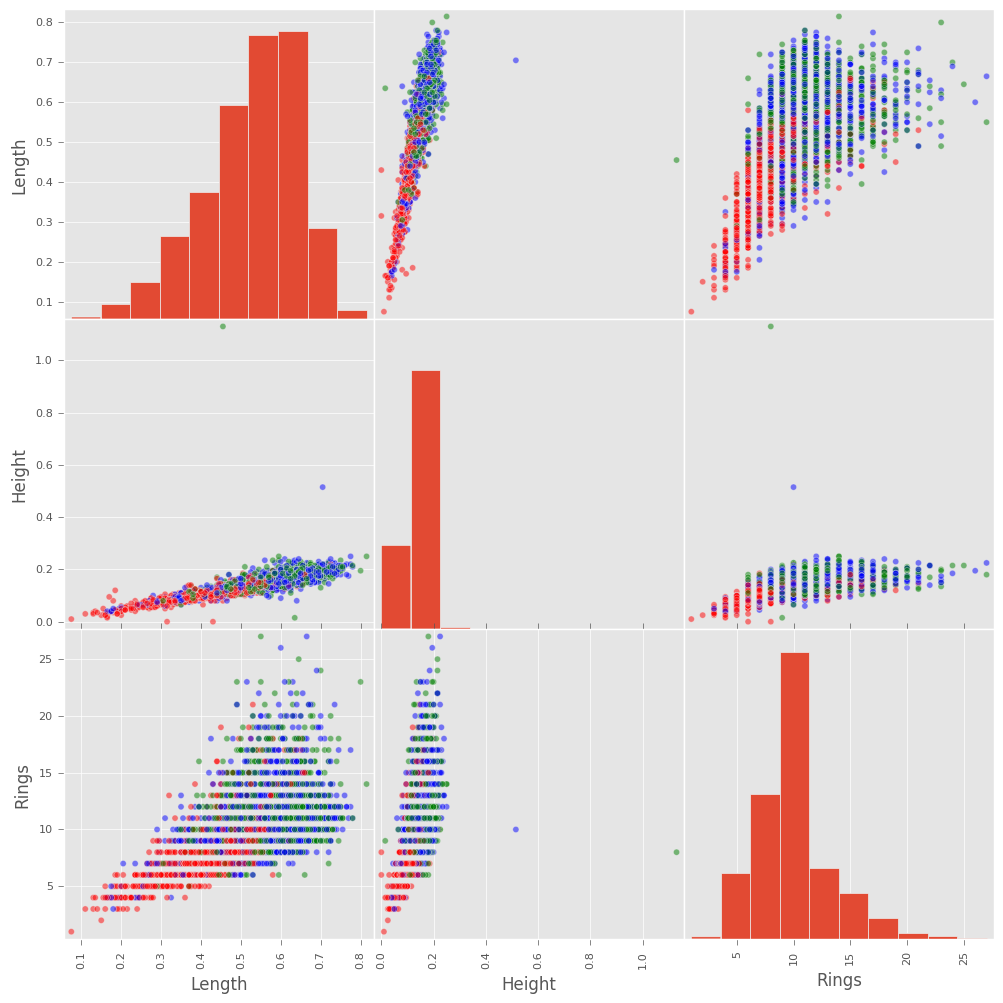

In [51]:
color_wheel = {"I": "red", 
               "M": "blue", 
               "F": "green"}
color = y_train.map(color_wheel)
pd.tools.plotting.scatter_matrix(X_train[['Length', 'Height', 'Rings']], c=color, s=80, figsize = (12,12))

In [ ]:
c = y_train
model = linear_model.LogisticRegression().\
   fit(X, c)
model.score()

In [53]:
c = y_train
cs = pd.get_dummies(c, prefix = None)
cs.head()

,F,I,M
3141,0.0,1.0,0.0
3521,0.0,1.0,0.0
883,0.0,0.0,1.0
3627,0.0,0.0,1.0
2106,0.0,0.0,1.0


In [ ]:
sm